### Importing the modules required for the data manipulation, ploting and applying mathematical & statistical analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, chi2_contingency, f_oneway, uniform
import numpy as np

#### Importing the cleaned dataset

In [2]:
df = pd.read_csv('bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [3]:
df.shape

(1000, 13)

In [4]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [5]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

#### Rearranging the columns

In [6]:
columns = ['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute_Distance', 'Region', 'Age',
       'Purchased_Bike']
df.columns = columns

#### Splitting the dataset into categorical and numerical features so that different statistical tests can be applied on the features separately.

In [7]:
categorical_features = ['Marital_Status', 'Gender', 'Education',
       'Occupation', 'Home_Owner', 'Commute_Distance', 'Region','Purchased_Bike']

for i in categorical_features:
    print(i)
    print(df[i].unique())
    print("\n")

Marital_Status
['Married' 'Single']


Gender
['Female' 'Male']


Education
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']


Occupation
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']


Home_Owner
['Yes' 'No']


Commute_Distance
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']


Region
['Europe' 'Pacific' 'North America']


Purchased_Bike
['No' 'Yes']




#### Encoding the Commute_Distance feature with average in the range provided for each category.

In [8]:
commute_map = {'0-1 Miles':0.5, '2-5 Miles':2.5, '5-10 Miles':7.5, '1-2 Miles':2.5, '10+ Miles':10.0}
df['Commute_Distance'] = [commute_map[miles] for miles in df['Commute_Distance']]

In [9]:
df['Purchased_Bike'] = df['Purchased_Bike'].replace({'Yes': 1, 'No': 0})
df

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0.5,Europe,42,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0.5,Europe,43,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2.5,Europe,60,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,7.5,Pacific,41,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0.5,Europe,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2.5,North America,54,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2.5,North America,35,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0.5,North America,38,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,2.5,North America,38,0


#### Categorising the numerical discrete features

In [10]:
numerical_features = ['Income', 'Children', 'Cars', 'Commute_Distance', 'Age']
target_variable = ['Purchased_Bike']

### Ploting a histogram to see the distribution of Categorical features.

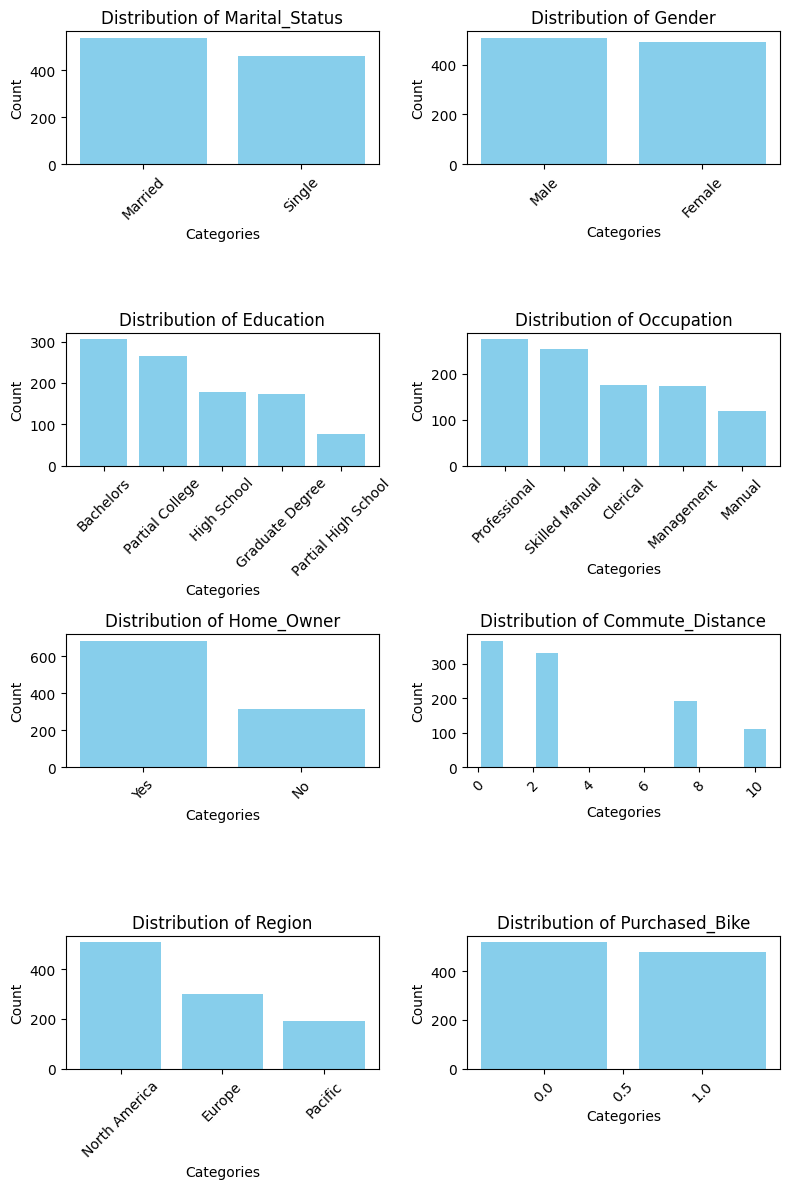

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
axes = axes.flatten()  

for i, feature in enumerate(categorical_features):
    category_counts = df[feature].value_counts()
    
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Plotting to check if the numerical features are distribributed normally.
- If a feature is normal it will be easier for applying the statistical analysis as it is.
- If the features is not distributed normally, then further feature scaling, transformation and will be necessary.
- If feature transformation doesn't help then further Non-Parametric Tests needed to be applied which are used for the data which is not normal  in nature.

#### To verify if the data is normal. Firstly a QQ-Plot is applied to verify the two quartiles of each features against each other.


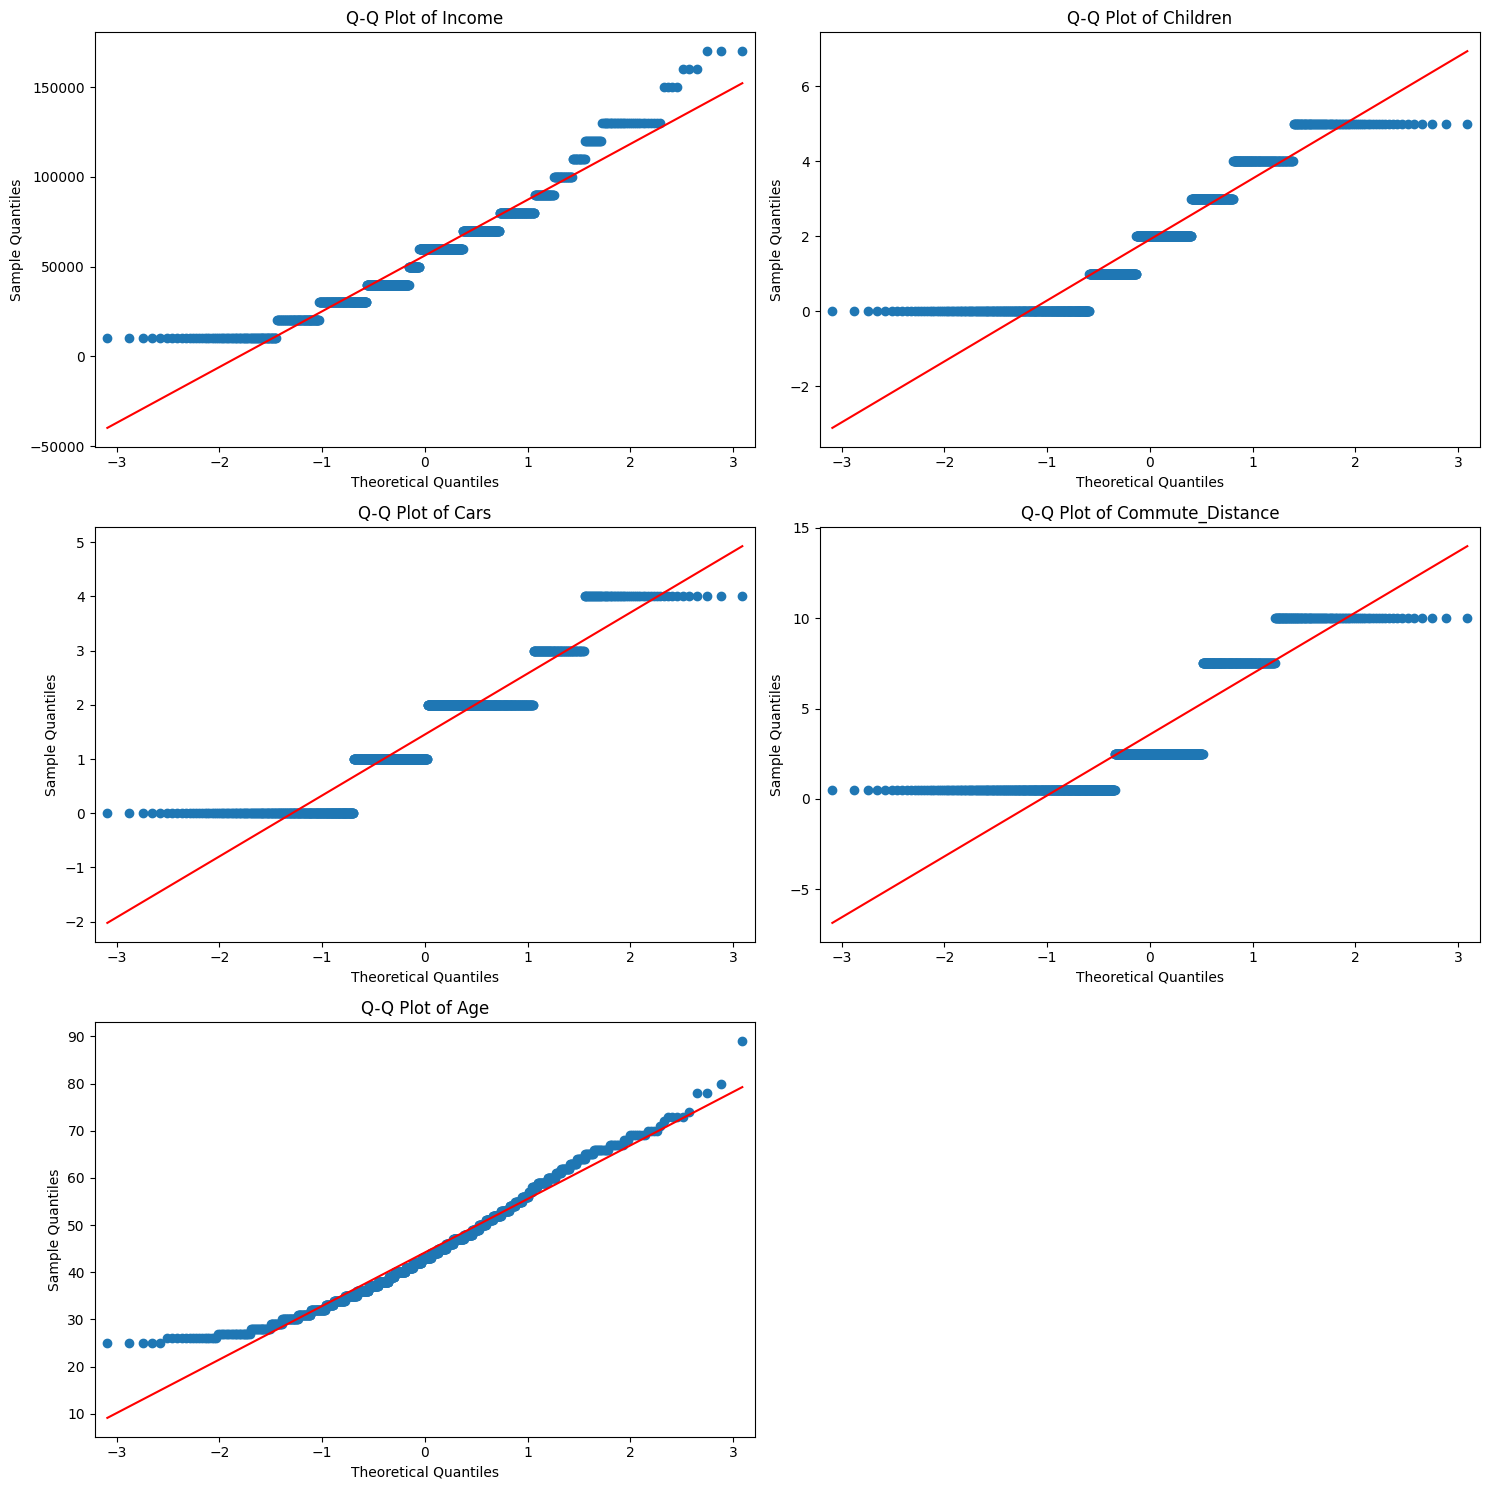

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    qqplot(df[feature], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {feature}')

if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- In the above plots, one can observe the _Income and Ages_ features are some what closely normally distributed along a straight line.
- Same cannot be said for the _Cars, Commute Distance and Children_ because they're a Categorical features which represents Ordinal data.
- The data points (represented in blue) for the Ordinal Data is curving at the edges of the line which says the data is not normally distributed, which is not a point of worry as these features will have seprate statistical tests.

#### Ploting a density and histogram plot to check the normality of the numerical features.

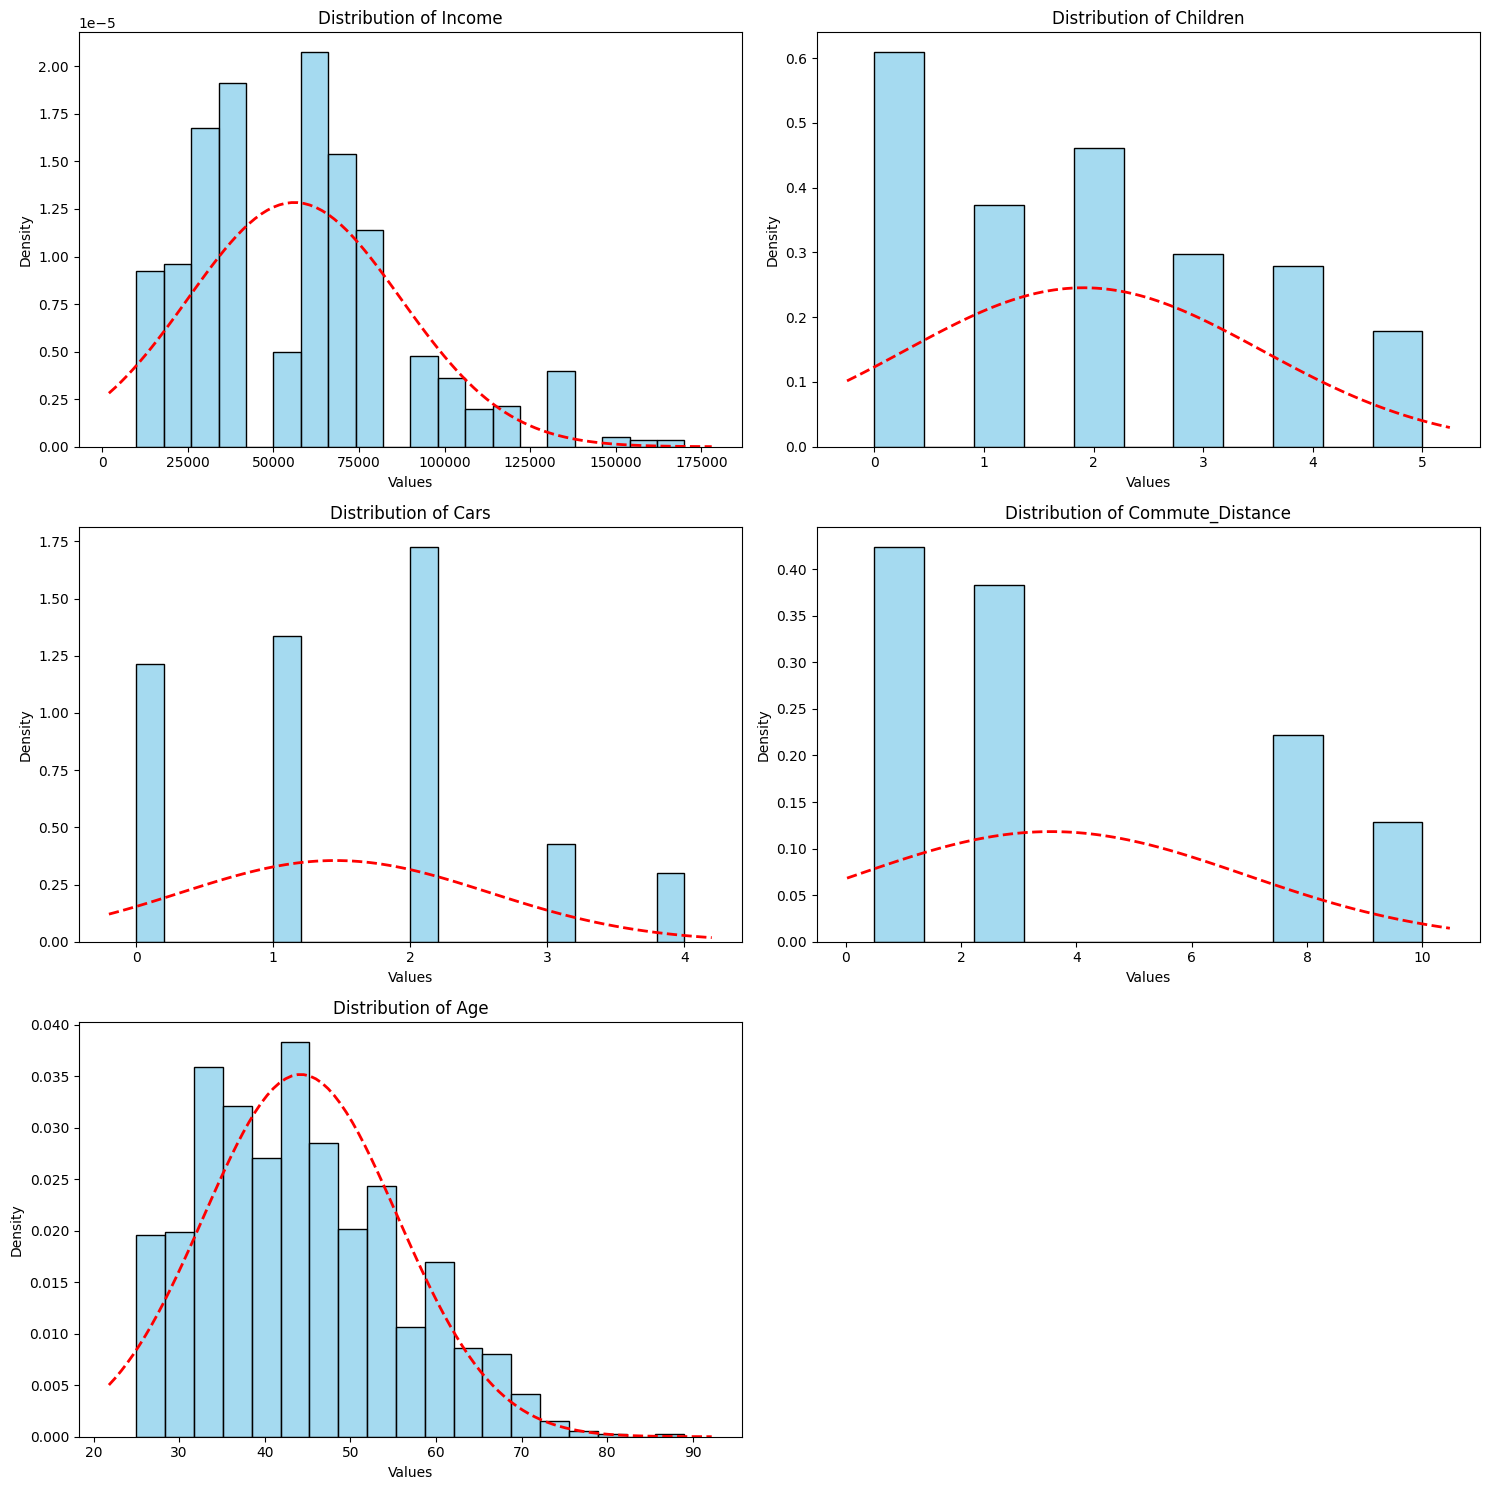

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, ax=axes[i], color='skyblue', stat='density')
    
    mean, std_dev = np.mean(df[feature]), np.std(df[feature])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std_dev)
    axes[i].plot(x, y, color='red', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- In the above plot, there is clear evidence of normal distribution for _Income and Age_ features.

### Hypothesis testing

#### Income group dependency on target 
- Feature description -> Continuous, Numerical and Normal -> Z test Two Sample (As per the Hypothesis)
- If the feature would tapper off more in the normality checking in the above plots, Mann-Whitney tests could be used.

In [23]:
df['Income'].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

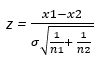
- x1 = mean of the first sample
- x2 = mean of the second sample
- σ = population standard deviation
- n1, n2 =  sizes of the respective samples

- Two Sample Hypothesis -> Mean income of -> Those who purchased the bike and Those who did not.

In [22]:
HO = 'There is no significant difference in mean income between those who purchased a bike and those who didn\'t'
HA = 'There is a significant difference in mean income between those who purchased a bike and those who didn\'t'

income_SD = np.std(df['Income'])
income_bike_yes = df[df['Purchased_Bike'] == 1]['Income']
income_bike_no = df[df['Purchased_Bike'] == 0]['Income']

mean_income_yes = np.mean(income_bike_yes)
mean_income_no = np.mean(income_bike_no)
num_yes = len(income_bike_yes)
num_no = len(income_bike_no)

print(f"mean_income_yes: {mean_income_yes}, mean_income_no: {mean_income_no}")
print(f"num_yes: {num_yes}, num_no: {num_no}")
print(f"income_SD: {income_SD}")
print("\n")

z_stat = (mean_income_yes - mean_income_no) / (income_SD * np.sqrt(1/num_yes + 1/num_no))

p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

alpha = 0.05
print(f'Z-statistic: {z_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print(f'Reject the Null Hypothesis: {HA}.')
else:
    print(f'Failed to reject the Null Hypothesis: {HO}.')

mean_income_yes: 57505.1975051975, mean_income_no: 54874.759152215796
num_yes: 481, num_no: 519
income_SD: 31066.065087165447


Z-statistic: 1.34
P-value: 0.1810
Failed to reject the Null Hypothesis: There is no significant difference in mean income between those who purchased a bike and those who didn't.


#### Age group dependency on the target
- Feature description -> Continuous, Numerical and Normal -> Z test Two Sample (As per the Hypothesis)

In [15]:
df['Age'].describe()

count    1000.000000
mean       44.190000
std        11.353537
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

- Two Sample Hypothesis -> Mean Age of -> Those who purchased the bike and Those who did not.

In [24]:
HO = 'There is no significant difference in mean age between those who purchased a bike and those who didn\'t'
HA = 'There is a significant difference in mean age between those who purchased a bike and those who didn\'t'

age_SD = np.std(df['Age'], ddof=1)

age_bike_yes = df[df['Purchased_Bike'] == 1]['Age']
age_bike_no = df[df['Purchased_Bike'] == 0]['Age']

mean_age_yes = np.mean(age_bike_yes)
mean_age_no = np.mean(age_bike_no)
num_yes = len(age_bike_yes)
num_no = len(age_bike_no)

print(f"mean_age_yes: {mean_age_yes}, mean_age_no: {mean_age_no}")
print(f"num_yes: {num_yes}, num_no: {num_no}")
print(f"age_SD: {age_SD}")
print("\n")

z_stat = (mean_age_yes - mean_age_no) / (age_SD * np.sqrt(1/num_yes + 1/num_no))

p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

alpha = 0.05
print(f'Z-statistic: {z_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print(f'Reject the Null Hypothesis: {HA}.')
else:
    print(f'Failed to reject the Null Hypothesis: {HO}.')

mean_age_yes: 42.93970893970894, mean_age_no: 45.348747591522155
num_yes: 481, num_no: 519
age_SD: 11.353537017282447


Z-statistic: -3.35
P-value: 0.0008
Reject the Null Hypothesis: There is a significant difference in mean age between those who purchased a bike and those who didn't.


#### Children group dependency on the target
- Feature description -> Discrete and Categorical -> Chi Square Two Proportion Test
- Note: Here _Children_ feature is used to apply statistical test seprately  because of hypothesis tesr which is not asking for dependency by dependency of number of children on target.

In [25]:
HO = 'There is no significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike'
HA = 'There is a significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike'

contingency_table = pd.crosstab(df['Children'], df['Purchased_Bike'])

bike_yes_0_children = contingency_table.loc[0, 1]
bike_yes_1_to_5_children = contingency_table.loc[range(1, 6), 1].sum()

print(f"Bike yes with 0 children: {bike_yes_0_children}")
print(f"Bike yes with 1-5 children: {bike_yes_1_to_5_children}")
print("\n")

chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
print(f'Chi-square statistic: {chi2:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print(f'Reject the Null Hypothesis: {HA}.')
else:
    print(f'Failed to reject the Null Hypothesis: {HO}.')


Bike yes with 0 children: 140
Bike yes with 1-5 children: 341


Chi-square statistic: 32.28
P-value: 0.0000
Reject the Null Hypothesis: There is a significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike.


#### Dependency of the Categorical features on the target using Chi Square test

In [29]:
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df[column], df['Purchased_Bike'])
    
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square statistic for {column}: {chi2:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    H0 = f"There is no association between {column} and bike purchase."
    HA = f"There is an association between {column} and bike purchase."
    
    alpha = 0.05
    
    if p_value < alpha:
        print(f"Reject the Null Hypothesis")
        print(f"Conclusion: {HA}\n")
    else:
        print(f"Failed to reject the Null Hypothesis")
        print(f"Conclusion: {HO}\n")


In [30]:
chi_square_test(df, 'Gender')
chi_square_test(df, 'Marital_Status')
chi_square_test(df, 'Education')
chi_square_test(df, 'Occupation')
chi_square_test(df, 'Home_Owner')
chi_square_test(df, 'Region')
chi_square_test(df, 'Cars')
chi_square_test(df, 'Commute_Distance')

Chi-square statistic for Gender: 0.09
P-value: 0.7681
Failed to reject the Null Hypothesis
Conclusion: There is no significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike

Chi-square statistic for Marital_Status: 11.54
P-value: 0.0007
Reject the Null Hypothesis
Conclusion: There is an association between Marital_Status and bike purchase.

Chi-square statistic for Education: 25.33
P-value: 0.0000
Reject the Null Hypothesis
Conclusion: There is an association between Education and bike purchase.

Chi-square statistic for Occupation: 8.01
P-value: 0.0914
Failed to reject the Null Hypothesis
Conclusion: There is no significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike

Chi-square statistic for Home_Owner: 0.29
P-value: 0.5872
Failed to reject the Null Hypothesis
Conclusion: There is no significant diffe

#### Dependency of mean income of different regions on target

In [32]:
HO = "There is no significant difference in mean income among different regions."
HA = "There is a difference in mean income among different regions."

regions = df['Region'].unique()
region_groups = [df[df['Region'] == region]['Income'] for region in regions]
f_stat, p_value = f_oneway(*region_groups)

alpha = 0.05
print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print('Reject the Null Hypothesis}')
    print(f"Conclusion: {HA}\n")
else:
    print('Failed to reject the Null Hypothesis')
    print(f"Conclusion: {HO}\n")

F-statistic: 62.87
P-value: 0.0000
Reject the Null Hypothesis}
Conclusion: There is a difference in mean income among different regions.

